In [ ]:
#importing necessary Python library for the Project
import pandas as pd # It's for Data analysis and Manipulating Data.
import numpy as np # It's will allow us to do Mathematical operation on the Project.
import seaborn as sns # It will allow us to do Statistical Visulization on the Data.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)# It will allow us to Visulize the Data
from scipy import stats
#To Handle the Warning 
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Found GPU at: /device:GPU:0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Reading ,Importing and Exploring 

In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Dataset_bigdata/Crime_Data.csv') 
Data.head(5)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [ ]:
Data.iloc[1:20,:10]

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329
5,120125367,01/08/2013,01/08/2013,1400,1,Central,111,110,CRIMINAL HOMICIDE,1243 2000 1813 1814 2002 0416 0400
6,101105609,01/28/2010,01/27/2010,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN
7,101620051,11/11/2010,11/07/2010,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN
8,101910498,04/07/2010,04/07/2010,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN
9,120908292,03/29/2013,01/15/2013,800,9,Van Nuys,904,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0344 1300
10,101927640,12/31/2010,12/30/2010,2100,19,Mission,1964,510,VEHICLE - STOLEN,NaN


In [ ]:
Data.iloc[1:12,10:-1]

,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Weapon Used Code,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street
1,NaN,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH
2,12.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN
3,NaN,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL
4,84.0,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN
5,49.0,F,W,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,110.0,NaN,NaN,NaN,600 N HILL ST,NaN
6,NaN,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51
7,NaN,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE
8,NaN,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL
9,27.0,F,O,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,668.0,NaN,NaN,NaN,7200 SEPULVEDA BL,NaN
10,NaN,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,NORDHOFF,TOBIAS


In [ ]:
Data.shape

(1584316, 26)

In [ ]:
Data.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [ ]:
Data.size

41192216

# Data analysis

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584316 entries, 0 to 1584315
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   DR Number               1584316 non-null  int64  
 1   Date Reported           1584316 non-null  object 
 2   Date Occurred           1584316 non-null  object 
 3   Time Occurred           1584316 non-null  int64  
 4   Area ID                 1584316 non-null  int64  
 5   Area Name               1584316 non-null  object 
 6   Reporting District      1584316 non-null  int64  
 7   Crime Code              1584316 non-null  int64  
 8   Crime Code Description  1583904 non-null  object 
 9   MO Codes                1412557 non-null  object 
 10  Victim Age              1455657 non-null  float64
 11  Victim Sex              1439117 non-null  object 
 12  Victim Descent          1439084 non-null  object 
 13  Premise Code            1584240 non-null  float64
 14  Pr

In [ ]:
Data.isnull().sum()

DR Number                       0
Date Reported                   0
Date Occurred                   0
Time Occurred                   0
Area ID                         0
Area Name                       0
Reporting District              0
Crime Code                      0
Crime Code Description        412
MO Codes                   171759
Victim Age                 128659
Victim Sex                 145199
Victim Descent             145232
Premise Code                   76
Premise Description          2751
Weapon Used Code          1059559
Weapon Description        1059560
Status Code                     2
Status Description              0
Crime Code 1                    7
Crime Code 2              1484319
Crime Code 3              1582133
Crime Code 4              1584247
Address                         0
Cross Street              1321583
Location                        9
dtype: int64

In [ ]:
#Unique Value Analysis on the DataSet Columns
for i in list(Data.columns):
    print("{} --> {}".format(i, Data[i].value_counts().shape[0]))

DR Number --> 1584316
Date Reported --> 2809
Date Occurred --> 2809
Time Occurred --> 1438
Area ID --> 21
Area Name --> 21
Reporting District --> 1280
Crime Code --> 138
Crime Code Description --> 134
MO Codes --> 347658
Victim Age --> 90
Victim Sex --> 5
Victim Descent --> 20
Premise Code --> 295
Premise Description --> 210
Weapon Used Code --> 80
Weapon Description --> 79
Status Code --> 9
Status Description --> 6
Crime Code 1 --> 145
Crime Code 2 --> 139
Crime Code 3 --> 53
Crime Code 4 --> 11
Address --> 70968
Cross Street --> 11121
Location  --> 60608


In [ ]:
print("Volume:"+str(Data.size)+"    "+"Shape:"+str(Data.shape))

Volume:41192216    Shape:(1584316, 26)


In [ ]:
Data.describe()

,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Code,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4
count,1.584316e+06,1.584316e+06,1.584316e+06,1.584316e+06,1.584316e+06,1.455657e+06,1.584240e+06,524757.000000,1.584309e+06,99997.000000,2183.000000,69.000000
mean,1.358072e+08,1.363975e+03,1.115232e+01,1.161595e+03,5.069982e+02,3.593419e+01,3.124071e+02,370.568852,5.068795e+02,954.461614,970.715529,967.173913
std,2.259098e+07,6.467544e+02,5.986703e+00,5.986644e+02,2.105490e+02,1.681156e+01,2.102334e+02,114.024156,2.104662e+02,123.611988,88.350046,97.571536
min,2.100000e+02,1.000000e+00,1.000000e+00,1.000000e+02,1.100000e+02,1.000000e+01,1.010000e+02,101.000000,1.100000e+02,121.000000,93.000000,421.000000
25%,1.121176e+08,9.300000e+02,6.000000e+00,6.450000e+02,3.300000e+02,2.300000e+01,1.020000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000
50%,1.401095e+08,1.430000e+03,1.200000e+01,1.204000e+03,4.400000e+02,3.400000e+01,2.100000e+02,400.000000,4.400000e+02,998.000000,998.000000,998.000000
75%,1.520186e+08,1.900000e+03,1.600000e+01,1.676000e+03,6.260000e+02,4.800000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.000000
max,9.102204e+08,2.359000e+03,2.100000e+01,2.198000e+03,9.560000e+02,9.900000e+01,9.710000e+02,516.000000,9.990000e+02,999.000000,999.000000,999.000000


# Data cleaning 

In [ ]:
dataframe=Data

In [ ]:
for i in dataframe:
    if dataframe[i].isnull().values.all():
        print(i+' contains all NaN: True')

In [ ]:
dataframe.isna().sum()

DR Number                       0
Date Reported                   0
Date Occurred                   0
Time Occurred                   0
Area ID                         0
Area Name                       0
Reporting District              0
Crime Code                      0
Crime Code Description        412
MO Codes                   171759
Victim Age                 128659
Victim Sex                 145199
Victim Descent             145232
Premise Code                   76
Premise Description          2751
Weapon Used Code          1059559
Weapon Description        1059560
Status Code                     2
Status Description              0
Crime Code 1                    7
Crime Code 2              1484319
Crime Code 3              1582133
Crime Code 4              1584247
Address                         0
Cross Street              1321583
Location                        9
dtype: int64

In [ ]:
print('Crime code 2 not NaN values:', dataframe['Crime Code 2'].count())
print('Crime code 3 not NaN values:', dataframe['Crime Code 3'].count())
print('Crime code 4 not NaN values:', dataframe['Crime Code 4'].count())

Crime code 2 not NaN values: 99997
Crime code 3 not NaN values: 2183
Crime code 4 not NaN values: 69


In [ ]:
dataframe.drop(columns=['Crime Code 1', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4'], inplace=True)

In [ ]:
dataframe['Premise Code'].fillna(0, inplace=True)
dataframe['Premise Description'].fillna("UNK", inplace=True)
dataframe['Weapon Used Code'].fillna(0, inplace=True)
dataframe['Weapon Description'].fillna("NO WEAPON", inplace=True)
dataframe['Cross Street'].fillna("UNK", inplace=True)
dataframe['Victim Age'].fillna(0, inplace=True)
dataframe['Victim Sex'].fillna("NO SEX", inplace=True)
dataframe['Victim Descent'].fillna("NO DESCENT", inplace=True)
dataframe.isna().sum()
dataframe['Crime Code Description'].fillna("Unknown", inplace=True)

In [ ]:
print('Number of Crime Code Description possible values:',len(dataframe['Crime Code Description'].value_counts()))
print('Number of Crime Code possible values:', len(dataframe['Crime Code'].value_counts()))

Number of Crime Code Description possible values: 135
Number of Crime Code possible values: 138


In [ ]:
print('Number of entries with unknown Crime Code Description:', len(dataframe[dataframe['Crime Code Description'].isnull()]))

Number of entries with unknown Crime Code Description: 0


In [ ]:
dataframe['MO Codes'].fillna(' ', inplace=True)

In [ ]:
# replace Time Occurred that has format HHMM (int) with HH:MM (str)
# NB: some values has format MM or HMM, so we need to add 0s in order to obtain HHMM
from datetime import datetime

dataframe['Time Occurred'] = dataframe['Time Occurred'].astype(str).str.zfill(4)

times = dataframe['Time Occurred'].unique()

times_sep = [i[:-2] + ':' + i[-2:] for i in times]

# check if HH and MM have valid values
for i in times_sep:
    hh = i.split(':')[0]
    mm = i.split(':')[1]
    if not int(hh) < 24 or not int(mm) < 60:
        print('found illegal time: ', i)

# replace each time with its equivalent time() value
dataframe['Time Occurred'].replace(times, [i.time() for i in pd.to_datetime(times_sep)], inplace=True) 
dataframe

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Victim Descent,Premise Code,Premise Description,Weapon Used Code,Weapon Description,Status Code,Status Description,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,18:00:00,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,6300 BRYNHURST AV,UNK,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,23:00:00,20,Olympic,2071,510,VEHICLE - STOLEN,,...,NO DESCENT,101.0,STREET,0.0,NO WEAPON,IC,Invest Cont,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,20:30:00,18,Southeast,1823,510,VEHICLE - STOLEN,,...,NO DESCENT,101.0,STREET,0.0,NO WEAPON,IC,Invest Cont,200 E 104TH ST,UNK,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,18:00:00,18,Southeast,1803,510,VEHICLE - STOLEN,,...,NO DESCENT,101.0,STREET,0.0,NO WEAPON,IC,Invest Cont,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,23:00:00,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,W,501.0,SINGLE FAMILY DWELLING,0.0,NO WEAPON,IC,Invest Cont,7200 CIRRUS WY,UNK,"(34.2009, -118.6369)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584311,172116482,09/07/2017,09/07/2017,10:05:00,21,Topanga,2141,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,W,501.0,SINGLE FAMILY DWELLING,0.0,NO WEAPON,IC,Invest Cont,23800 CALVERT ST,UNK,"(34.1883, -118.6536)"
1584312,172116489,09/07/2017,09/07/2017,12:00:00,21,Topanga,2156,330,BURGLARY FROM VEHICLE,0344 1605,...,W,108.0,PARKING LOT,0.0,NO WEAPON,IC,Invest Cont,6600 TOPANGA CANYON BL,UNK,"(34.1905, -118.6059)"
1584313,172116491,08/30/2017,07/15/2017,00:01:00,21,Topanga,2147,649,DOCUMENT FORGERY / STOLEN FELONY,0930 1822,...,W,203.0,OTHER BUSINESS,0.0,NO WEAPON,IC,Invest Cont,20900 SHERMAN WY,UNK,"(34.201, -118.5885)"
1584314,172116498,09/08/2017,09/08/2017,18:45:00,21,Topanga,2136,946,OTHER MISCELLANEOUS CRIME,1402,...,H,101.0,STREET,0.0,NO WEAPON,IC,Invest Cont,REMMET,WYANDOTTE,"(34.2029, -118.6003)"


In [ ]:
# convert Date Occurred and Date Reported to datetime types

print(type(dataframe['Date Occurred'][0]), type(dataframe['Date Reported'][0]))
dataframe['Date Occurred'] = pd.to_datetime(dataframe['Date Occurred'], format='%m/%d/%Y')
dataframe['Date Reported'] = pd.to_datetime(dataframe['Date Reported'], format='%m/%d/%Y')

print(type(dataframe['Date Occurred'][0]), type(dataframe['Date Reported'][0]))

<class 'str'> <class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# add column date-time occurred with both date and time (datetime format)
dataframe['Date-Time Occurred'] = pd.to_datetime(dataframe['Date Occurred'].astype(str) + ' ' + dataframe['Time Occurred'].astype(str))

In [ ]:
years = dataframe['Date Occurred'].dt.year
dataframe['Year Occurred'] = years
months = dataframe['Date Occurred'].dt.month
dataframe['Month Occurred'] = months
hours = dataframe['Date-Time Occurred'].dt.hour
dataframe['Hour Occurred'] = hours
weekdays = [i.isoweekday() for i in dataframe['Date Occurred']]
dataframe['Weekday Occurred'] = weekdays

In [ ]:
def check_timeslot(hour):
    slot = 8
    for i in range (1,8):
        if 3*(i-1) <= int(hour) < 3*i:
            slot = i
    return slot


dataframe['Timeslot Occurred'] = [check_timeslot(i.hour) for i in dataframe['Date-Time Occurred']]

In [ ]:
# check if all ages are > 0
if len(dataframe[dataframe['Victim Age'] <= 0]['Victim Age']) > 0:
    print('Column Victim Age contains non-positive values')
else:
    print('All values in Victim Age column are positive')

Column Victim Age contains non-positive values


In [ ]:
# check if all coordinates are != (0,0)
dataframe.rename(index=str, columns={"Location ": "Location"}, inplace=True)
indexes = dataframe.index[dataframe['Location'] == '(0, 0)'].tolist()

# NB: CONTROLLARE PRIMA QUANTE NE SONO E SPIEGARE CHE LE TOGLIAMO PERCHÈ SONO MENO DEL 5%
# rimuoviamo righe con NaN in location
print('NaN values in location column:', len(dataframe) - dataframe['Location'].count())
dataframe.dropna(subset=['Location'], inplace=True)

if len(indexes) > 0:
    print('{p}% of location values are non-significant'.format(p=round(len(indexes)/len(dataframe)*100, 2)))
    print('Dropping rows containing non-significant values...')
    dataframe.drop(index=indexes, inplace=True)
else:
    print('All values in Location column are significant')

NaN values in location column: 9
0.35% of location values are non-significant
Dropping rows containing non-significant values...


In [ ]:
dataframe['Coordinates'] = [eval(i) for i in dataframe['Location']]
del dataframe['Location']

In [ ]:
x = dataframe.duplicated(subset=['Date-Time Occurred', 'Area ID', 'Crime Code', 'Victim Age', 'Victim Sex', 'Victim Descent'])
c = 0
for i in x:
    if i:
        c+=1
print('Duplicates:', c)

Duplicates: 12121


In [ ]:
dataframe.drop_duplicates(subset=['Date-Time Occurred', 'Area ID', 'Crime Code', 'Victim Age', 'Victim Sex', 'Victim Descent'], inplace=True)

In [ ]:
dataframe['Victim Descent'].replace(['-'], ['X'], inplace=True)

In [ ]:
print(dataframe['Status Code'].value_counts())
print( )
print(dataframe[dataframe['Status Description']=='UNK']['Status Code'].value_counts())

dataframe['Status Code'].replace(['TH', '13', '19', np.nan], ['CC', 'CC', 'CC', 'CC'], inplace=True)

IC    1212958
AO     176916
AA     160581
JA      12399
JO       3821
CC         24
TH          1
13          1
19          1
Name: Status Code, dtype: int64

CC    24
TH     1
13     1
19     1
Name: Status Code, dtype: int64


In [ ]:
dataframe['Victim Sex'].value_counts()

M         732937
F         670971
NO SEX    139259
X          23484
H             52
-              1
Name: Victim Sex, dtype: int64

In [ ]:
indexes = dataframe[(dataframe['Victim Sex'] == 'H') | (dataframe['Victim Sex'] == '-')].index
dataframe.drop(indexes, inplace=True)
dataframe['Victim Sex'].value_counts()

M         732937
F         670971
NO SEX    139259
X          23484
Name: Victim Sex, dtype: int64

# Dataset After clean

In [ ]:
dataframe

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Address,Cross Street,Date-Time Occurred,Year Occurred,Month Occurred,Hour Occurred,Weekday Occurred,Timeslot Occurred,Coordinates
0,1208575,2013-03-14,2013-03-11,18:00:00,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,Adult Other,6300 BRYNHURST AV,UNK,2013-03-11 18:00:00,2013,3,18,1,7,"(33.9829, -118.3338)"
1,102005556,2010-01-25,2010-01-22,23:00:00,20,Olympic,2071,510,VEHICLE - STOLEN,,...,Invest Cont,VAN NESS,15TH,2010-01-22 23:00:00,2010,1,23,5,8,"(34.0454, -118.3157)"
2,418,2013-03-19,2013-03-18,20:30:00,18,Southeast,1823,510,VEHICLE - STOLEN,,...,Invest Cont,200 E 104TH ST,UNK,2013-03-18 20:30:00,2013,3,20,1,7,"(33.942, -118.2717)"
3,101822289,2010-11-11,2010-11-10,18:00:00,18,Southeast,1803,510,VEHICLE - STOLEN,,...,Invest Cont,88TH,WALL,2010-11-10 18:00:00,2010,11,18,3,7,"(33.9572, -118.2717)"
4,42104479,2014-01-11,2014-01-04,23:00:00,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,Invest Cont,7200 CIRRUS WY,UNK,2014-01-04 23:00:00,2014,1,23,6,8,"(34.2009, -118.6369)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584311,172116482,2017-09-07,2017-09-07,10:05:00,21,Topanga,2141,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,Invest Cont,23800 CALVERT ST,UNK,2017-09-07 10:05:00,2017,9,10,4,4,"(34.1883, -118.6536)"
1584312,172116489,2017-09-07,2017-09-07,12:00:00,21,Topanga,2156,330,BURGLARY FROM VEHICLE,0344 1605,...,Invest Cont,6600 TOPANGA CANYON BL,UNK,2017-09-07 12:00:00,2017,9,12,4,5,"(34.1905, -118.6059)"
1584313,172116491,2017-08-30,2017-07-15,00:01:00,21,Topanga,2147,649,DOCUMENT FORGERY / STOLEN FELONY,0930 1822,...,Invest Cont,20900 SHERMAN WY,UNK,2017-07-15 00:01:00,2017,7,0,6,1,"(34.201, -118.5885)"
1584314,172116498,2017-09-08,2017-09-08,18:45:00,21,Topanga,2136,946,OTHER MISCELLANEOUS CRIME,1402,...,Invest Cont,REMMET,WYANDOTTE,2017-09-08 18:45:00,2017,9,18,5,7,"(34.2029, -118.6003)"


In [ ]:
dataframe.isnull().sum()

DR Number                 0
Date Reported             0
Date Occurred             0
Time Occurred             0
Area ID                   0
Area Name                 0
Reporting District        0
Crime Code                0
Crime Code Description    0
MO Codes                  0
Victim Age                0
Victim Sex                0
Victim Descent            0
Premise Code              0
Premise Description       0
Weapon Used Code          0
Weapon Description        0
Status Code               0
Status Description        0
Address                   0
Cross Street              0
Date-Time Occurred        0
Year Occurred             0
Month Occurred            0
Hour Occurred             0
Weekday Occurred          0
Timeslot Occurred         0
Coordinates               0
dtype: int64

# Data Visualization

In [ ]:
# show descriptive statistics using pandas
victim_age_descr = dataframe['Victim Age'].describe()
print('statistics about victim ages:')
victim_age_descr.astype('int32')
print(dataframe['Victim Age'].value_counts().head(10))
indexes = dataframe[(dataframe['Victim Sex'] == 'H') | (dataframe['Victim Sex'] == '-')].index
dataframe.drop(indexes, inplace=True)
dataframe['Victim Sex'].value_counts()

statistics about victim ages:
0.0     124924
15.0     37028
25.0     36728
24.0     35882
26.0     35503
23.0     34922
27.0     34895
28.0     34361
29.0     34130
30.0     33491
Name: Victim Age, dtype: int64


M         732937
F         670971
NO SEX    139259
X          23484
Name: Victim Sex, dtype: int64

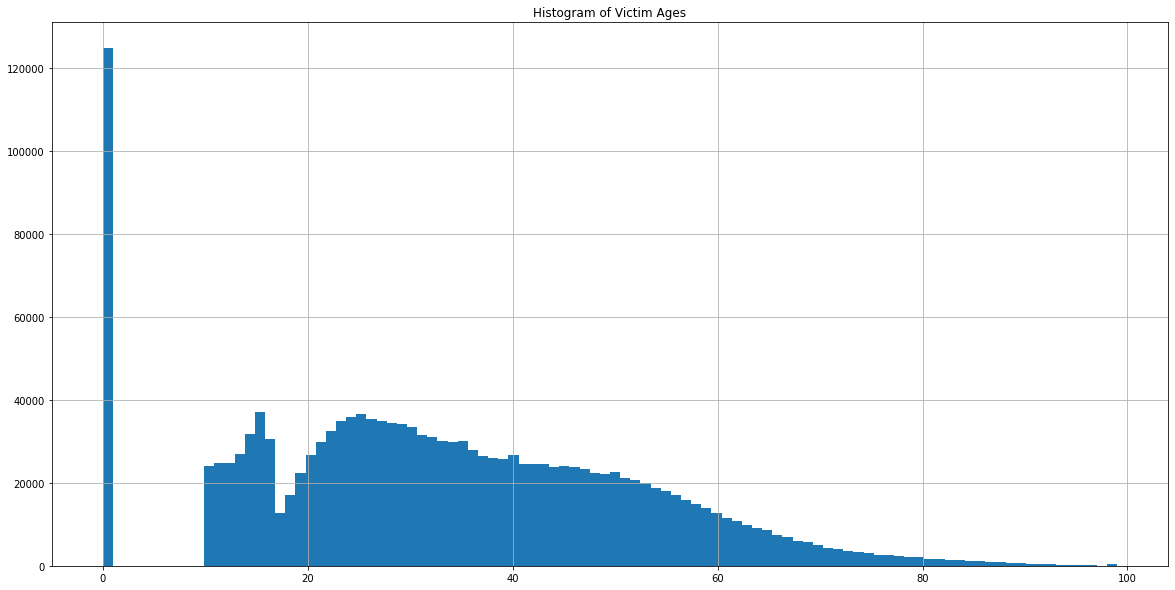

In [ ]:
dataframe['Victim Age'].hist(bins=100,figsize=(20,10))
plt.title('Histogram of Victim Ages')
plt.show()

In [ ]:
against_pers = dataframe['Victim Sex'].count()
n=against_pers*100/len(dataframe)
print(dataframe['Victim Sex'].value_counts().head(10))
print('crimes against people: {n}%'.format(n=round(n,2)))
print('other crimes: {v}%'.format(v=round(100-n,2)))

M         732937
F         670971
NO SEX    139259
X          23484
Name: Victim Sex, dtype: int64
crimes against people: 100.0%
other crimes: 0.0%


In [ ]:
def annotate_plot(plot, x=.18, y=.2, font=15):
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for i in plot.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in plot.patches:
        # get_x pulls left or right; get_height pushes up or down
        plot.text(i.get_x()+x, i.get_height()+y, str(round((i.get_height()/total)*100, 2))+'%', fontsize=font, color='dimgrey')


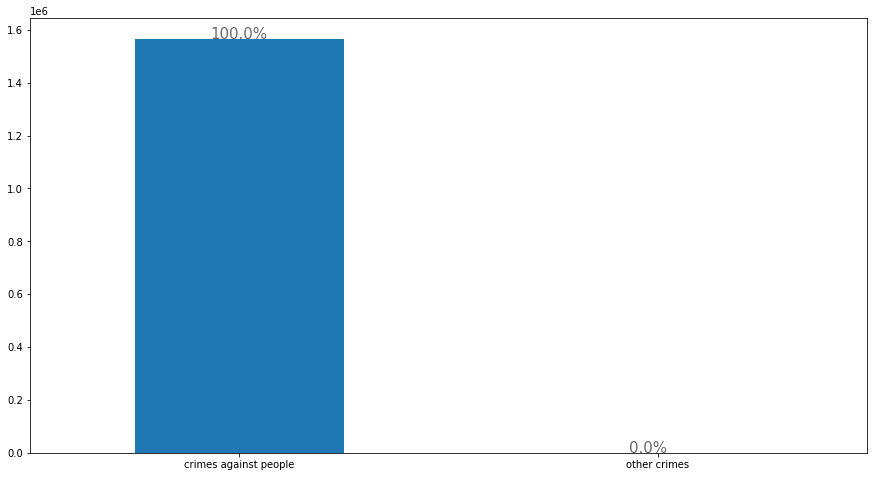

In [ ]:
sr_against_p = pd.Series({'crimes against people': against_pers,
               'other crimes' : len(dataframe)-against_pers})

plot = sr_against_p.plot.bar(figsize=(15,8))

annotate_plot(plot)
plt.xticks(rotation=0)
plt.show()

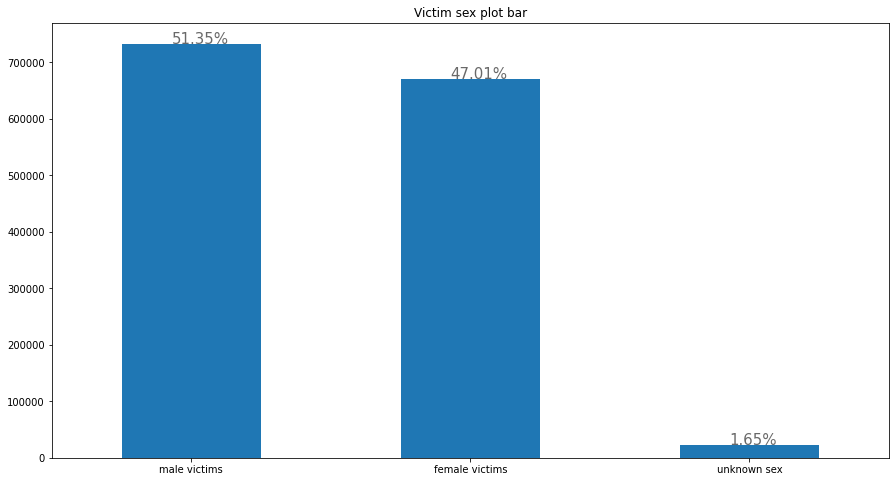

In [ ]:
# victim sex percentage
sex_perc = dataframe['Victim Sex'].value_counts()

sr_sex = pd.Series({'male victims': sex_perc['M'],
               'female victims' : sex_perc['F'],
                   'unknown sex' : sex_perc['X']})

plot = sr_sex.plot.bar(figsize=(15,8))
annotate_plot(plot)
plt.title('Victim sex plot bar')
plt.xticks(rotation=0)
plt.show()

77th Street    109246
Southwest      101117
N Hollywood     85578
Pacific         82724
Southeast       82415
Mission         79093
Northeast       75907
Van Nuys        74765
Newton          73318
Devonshire      73099
Topanga         72553
Hollywood       71491
Harbor          69992
Olympic         69531
West Valley     67276
Central         66560
Rampart         66409
West LA         65761
Wilshire        63164
Foothill        60045
Hollenbeck      56607
Name: Area Name, dtype: int64


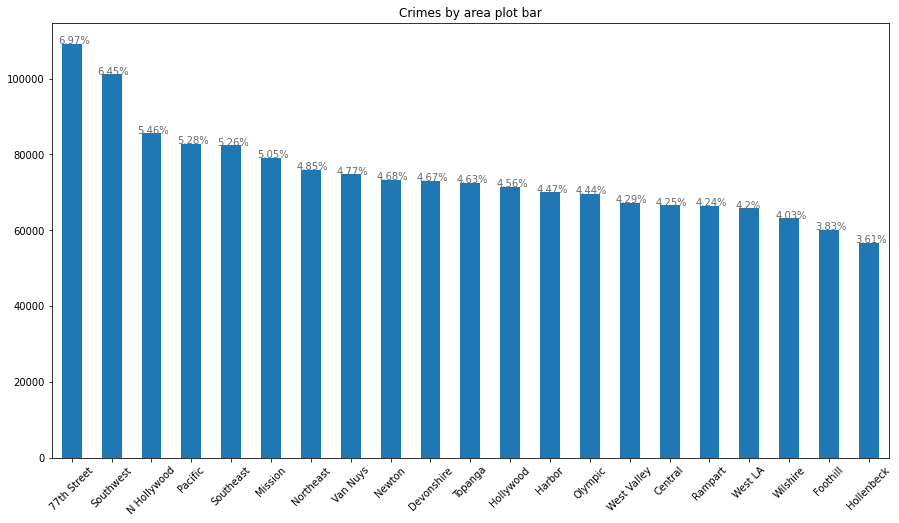

In [ ]:
area_freq = dataframe['Area Name'].value_counts()
print(area_freq)
plot = area_freq.plot.bar(figsize=(15,8))
annotate_plot(plot, x=-.1,font=10)
plt.title('Crimes by area plot bar')
plt.xticks(rotation=45)
plt.show()

NO WEAPON                                         1047457
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     316875
VERBAL THREAT                                       43366
UNKNOWN WEAPON/OTHER WEAPON                         40341
HAND GUN                                            24865
SEMI-AUTOMATIC PISTOL                                9924
KNIFE WITH BLADE 6INCHES OR LESS                     9253
OTHER KNIFE                                          6890
UNKNOWN FIREARM                                      5940
VEHICLE                                              5222
Name: Weapon Description, dtype: int64


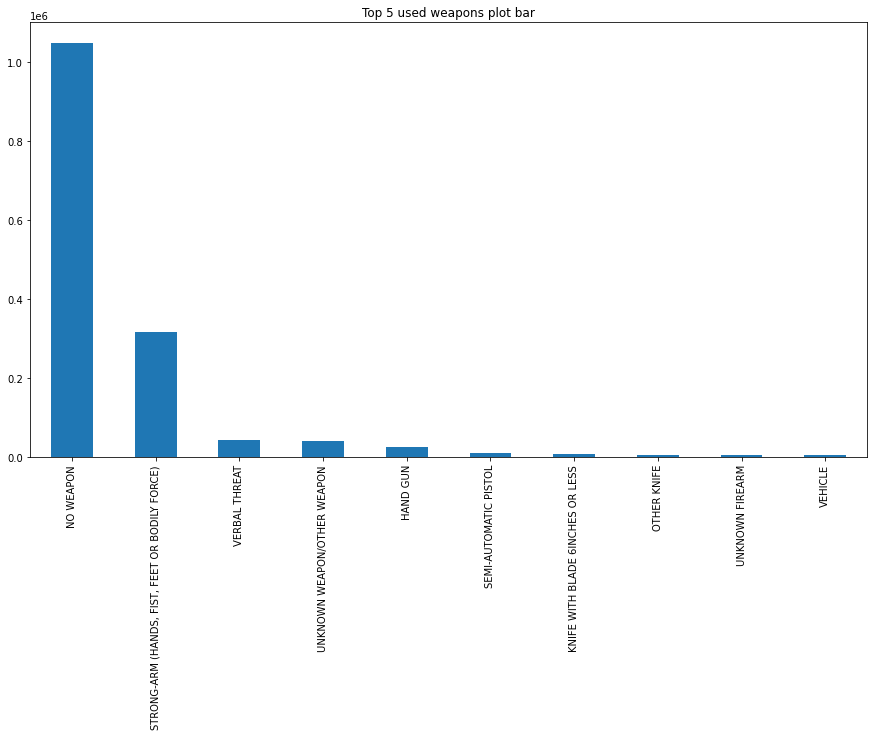

In [ ]:
# top 5 weapon used
weapon_freq = dataframe['Weapon Description'].value_counts()[:10]
print(weapon_freq)
plot = weapon_freq.plot.bar(figsize=(15,8))
plt.title('Top 5 used weapons plot bar')
plt.show()

BATTERY - SIMPLE ASSAULT                                        144564
BURGLARY FROM VEHICLE                                           120747
VEHICLE - STOLEN                                                115878
BURGLARY                                                        114031
THEFT PLAIN - PETTY ($950 & UNDER)                              113120
THEFT OF IDENTITY                                                99925
INTIMATE PARTNER - SIMPLE ASSAULT                                85556
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114     78930
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                         71161
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                   66486
Name: Crime Code Description, dtype: int64


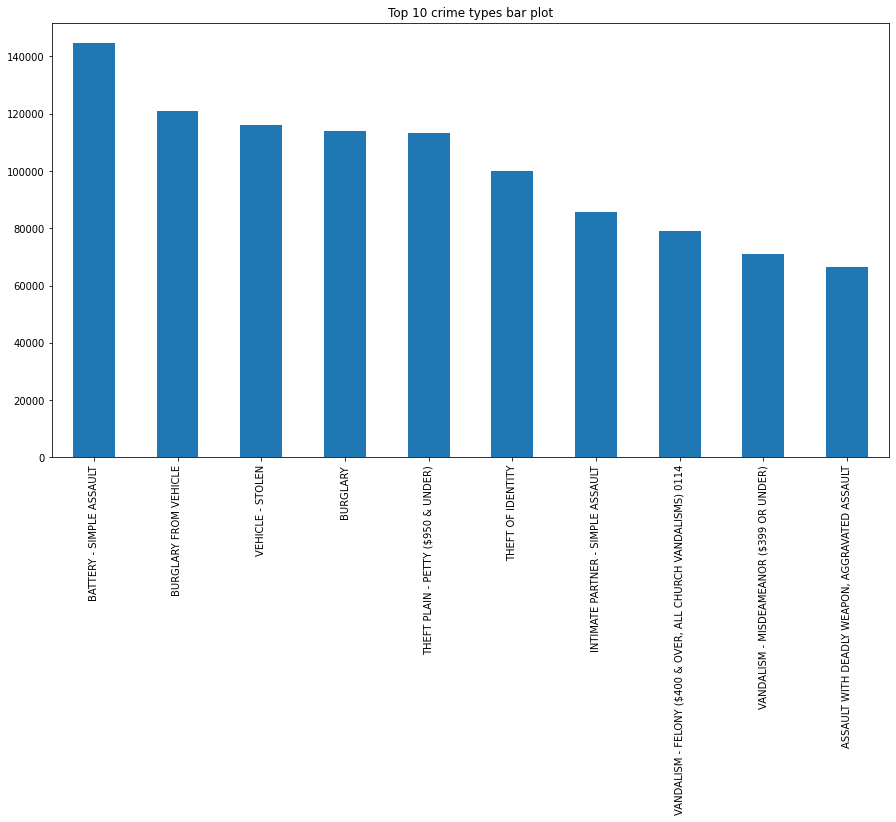

In [ ]:
# top 5 crime types 
type_freq = dataframe['Crime Code Description'].value_counts()[:10]
print(type_freq)
plot = type_freq.plot.bar(figsize=(15,8))
plt.title('Top 10 crime types bar plot')
#plt.xticks(rotation=45)
plt.show()

In [ ]:
dataframe['Year Occurred'].value_counts()

2016    221305
2015    212302
2010    206751
2012    198686
2011    198475
2014    192861
2013    190370
2017    145901
Name: Year Occurred, dtype: int64

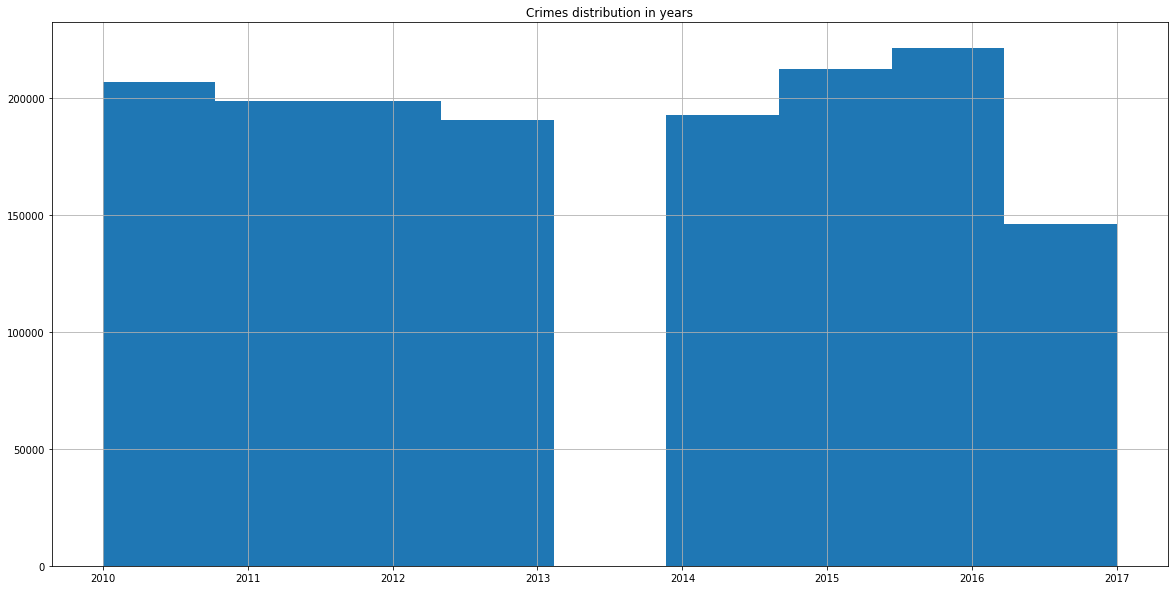

In [ ]:
dataframe['Year Occurred'].hist(bins=9, figsize=(20,10))
plt.title('Crimes distribution in years')
plt.show()

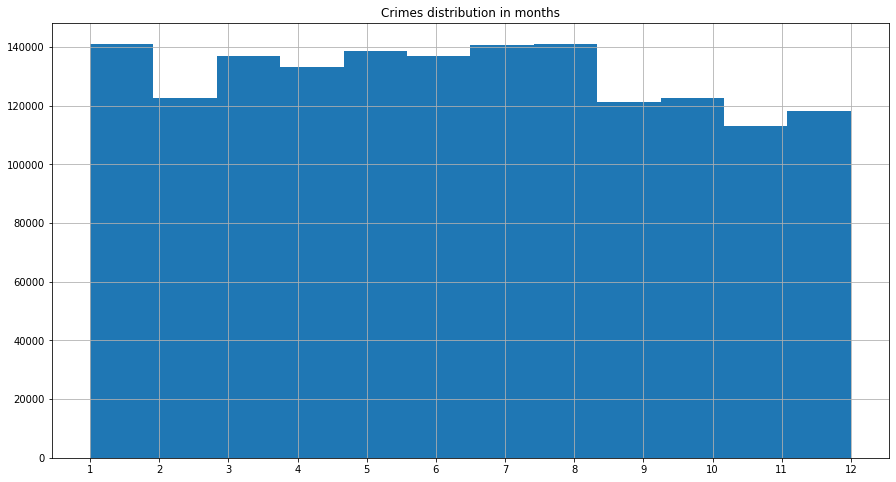

In [ ]:
months = pd.Series([i.month for i in dataframe['Date Occurred']])
months.hist(bins=12, figsize=(15,8))
plt.title('Crimes distribution in months')
plt.xticks([i for i in range (1,13)], rotation=0)
plt.show()

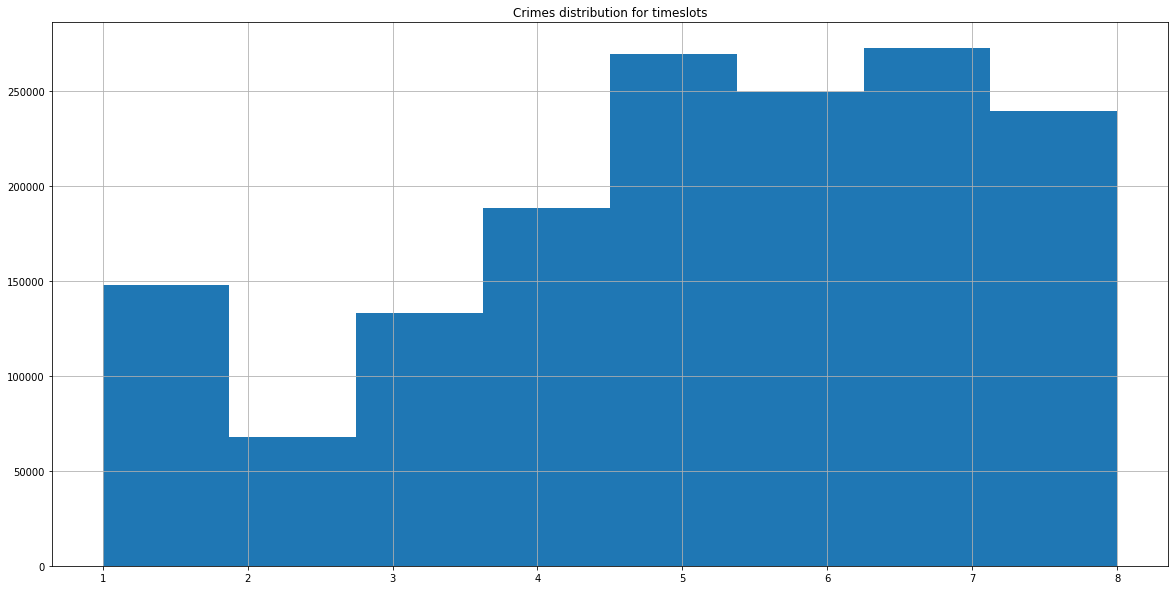

In [ ]:
dataframe['Timeslot Occurred'].hist(bins=8, figsize=(20,10))
plt.title('Crimes distribution for timeslots')
plt.show()

Other Asian                        36930
Black                             253341
Chinese                              616
Cambodian                             15
Filipino                            1870
Guamanian                             61
Hispanic/Latin/Mexican            545047
American Indian/Alaskan Native       661
Japanese                             237
Korean                              7108
Laotian                               10
Other                             151349
Pacific Isalnder                     276
Samoan                                23
Hawaiian                             128
Vietnamese                            85
White                             389129
Unknown                            40418
Asian Indian                          55
dtype: int64


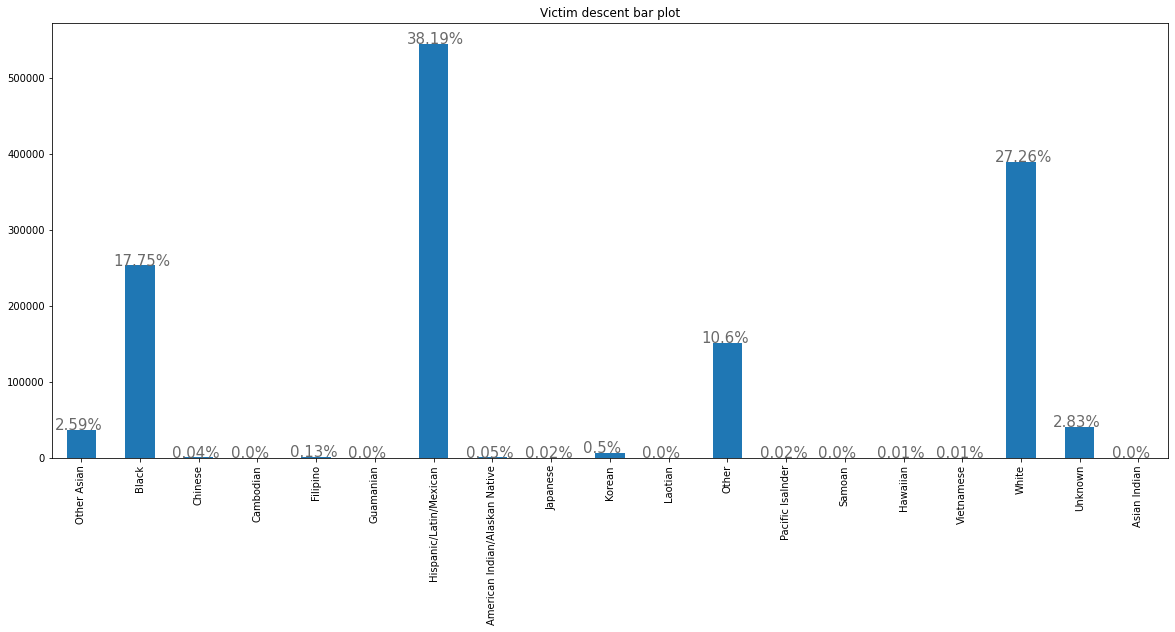

In [ ]:
desc_freq = dataframe['Victim Descent'].value_counts()

descs_descr = pd.Series({'Other Asian':desc_freq['A'], 
              'Black':desc_freq['B'],
              'Chinese':desc_freq['C'],
              'Cambodian':desc_freq['D'],
              'Filipino':desc_freq['F'],
              'Guamanian':desc_freq['G'],
              'Hispanic/Latin/Mexican':desc_freq['H'],
              'American Indian/Alaskan Native':desc_freq['I'],
              'Japanese':desc_freq['J'],
              'Korean':desc_freq['K'],
              'Laotian':desc_freq['L'], 
              'Other':desc_freq['O'],
              'Pacific Isalnder':desc_freq['P'],
              'Samoan':desc_freq['S'],
              'Hawaiian':desc_freq['U'],
              'Vietnamese':desc_freq['V'],
              'White':desc_freq['W'],
              'Unknown':desc_freq['X'],
              'Asian Indian':desc_freq['Z']})

plot = descs_descr.plot.bar(figsize=(20,8))
print(descs_descr)
annotate_plot(plot, x=-.2)
plt.title('Victim descent bar plot')
plt.show()

In [ ]:
dataframe.head()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1566651 entries, 0 to 1584315
Data columns (total 28 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   DR Number               1566651 non-null  int64         
 1   Date Reported           1566651 non-null  datetime64[ns]
 2   Date Occurred           1566651 non-null  datetime64[ns]
 3   Time Occurred           1566651 non-null  object        
 4   Area ID                 1566651 non-null  int64         
 5   Area Name               1566651 non-null  object        
 6   Reporting District      1566651 non-null  int64         
 7   Crime Code              1566651 non-null  int64         
 8   Crime Code Description  1566651 non-null  object        
 9   MO Codes                1566651 non-null  object        
 10  Victim Age              1566651 non-null  float64       
 11  Victim Sex              1566651 non-null  object        
 12  Victim Descent     

In [ ]:
dataframe.drop(columns=['Date Occurred','Premise Description'], inplace=True)

In [ ]:
dataframe

,DR Number,Date Reported,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,...,Status Description,Address,Cross Street,Date-Time Occurred,Year Occurred,Month Occurred,Hour Occurred,Weekday Occurred,Timeslot Occurred,Coordinates
0,1208575,2013-03-14,18:00:00,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,30.0,...,Adult Other,6300 BRYNHURST AV,UNK,2013-03-11 18:00:00,2013,3,18,1,7,"(33.9829, -118.3338)"
1,102005556,2010-01-25,23:00:00,20,Olympic,2071,510,VEHICLE - STOLEN,,0.0,...,Invest Cont,VAN NESS,15TH,2010-01-22 23:00:00,2010,1,23,5,8,"(34.0454, -118.3157)"
2,418,2013-03-19,20:30:00,18,Southeast,1823,510,VEHICLE - STOLEN,,12.0,...,Invest Cont,200 E 104TH ST,UNK,2013-03-18 20:30:00,2013,3,20,1,7,"(33.942, -118.2717)"
3,101822289,2010-11-11,18:00:00,18,Southeast,1803,510,VEHICLE - STOLEN,,0.0,...,Invest Cont,88TH,WALL,2010-11-10 18:00:00,2010,11,18,3,7,"(33.9572, -118.2717)"
4,42104479,2014-01-11,23:00:00,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,84.0,...,Invest Cont,7200 CIRRUS WY,UNK,2014-01-04 23:00:00,2014,1,23,6,8,"(34.2009, -118.6369)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584311,172116482,2017-09-07,10:05:00,21,Topanga,2141,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,51.0,...,Invest Cont,23800 CALVERT ST,UNK,2017-09-07 10:05:00,2017,9,10,4,4,"(34.1883, -118.6536)"
1584312,172116489,2017-09-07,12:00:00,21,Topanga,2156,330,BURGLARY FROM VEHICLE,0344 1605,40.0,...,Invest Cont,6600 TOPANGA CANYON BL,UNK,2017-09-07 12:00:00,2017,9,12,4,5,"(34.1905, -118.6059)"
1584313,172116491,2017-08-30,00:01:00,21,Topanga,2147,649,DOCUMENT FORGERY / STOLEN FELONY,0930 1822,52.0,...,Invest Cont,20900 SHERMAN WY,UNK,2017-07-15 00:01:00,2017,7,0,6,1,"(34.201, -118.5885)"
1584314,172116498,2017-09-08,18:45:00,21,Topanga,2136,946,OTHER MISCELLANEOUS CRIME,1402,47.0,...,Invest Cont,REMMET,WYANDOTTE,2017-09-08 18:45:00,2017,9,18,5,7,"(34.2029, -118.6003)"


In [ ]:
Data.head()

,DR Number,Date Reported,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,...,Status Description,Address,Cross Street,Date-Time Occurred,Year Occurred,Month Occurred,Hour Occurred,Weekday Occurred,Timeslot Occurred,Coordinates
0,1208575,2013-03-14,18:00:00,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,30.0,...,Adult Other,6300 BRYNHURST AV,UNK,2013-03-11 18:00:00,2013,3,18,1,7,"(33.9829, -118.3338)"
1,102005556,2010-01-25,23:00:00,20,Olympic,2071,510,VEHICLE - STOLEN,,0.0,...,Invest Cont,VAN NESS,15TH,2010-01-22 23:00:00,2010,1,23,5,8,"(34.0454, -118.3157)"
2,418,2013-03-19,20:30:00,18,Southeast,1823,510,VEHICLE - STOLEN,,12.0,...,Invest Cont,200 E 104TH ST,UNK,2013-03-18 20:30:00,2013,3,20,1,7,"(33.942, -118.2717)"
3,101822289,2010-11-11,18:00:00,18,Southeast,1803,510,VEHICLE - STOLEN,,0.0,...,Invest Cont,88TH,WALL,2010-11-10 18:00:00,2010,11,18,3,7,"(33.9572, -118.2717)"
4,42104479,2014-01-11,23:00:00,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,84.0,...,Invest Cont,7200 CIRRUS WY,UNK,2014-01-04 23:00:00,2014,1,23,6,8,"(34.2009, -118.6369)"


In [ ]:
import scipy.stats as ss
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:

# WHOLE DATASET MO CODES CLASSIFICATION RESULTS
features = Data.iloc[:,:-1]

In [ ]:
target=Data.iloc[:,10:11]

In [ ]:
target

,Victim Sex
0,F
1,NO SEX
2,NO SEX
3,NO SEX
4,M
...,...
1584311,F
1584312,M
1584313,M
1584314,M


In [ ]:
if features.shape[0] == target.shape[0]:
    print("Shape is equal on both features and Target. It is ready to further Operation")
else:
    print("shape different . This will create error on program")

Shape is equal on both features and Target. It is ready to further Operation


In [ ]:
#importing necassary library for futher operation 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import  plot_roc_curve
from sklearn.preprocessing import LabelEncoder

In [ ]:
# This function will return the labeled encoded datafram of Categorical data
def label_encode_cat_features(data, cat_features):
    '''
    Given a dataframe and its categorical features, this function returns label-encoded dataframe
    '''
    
    label_encoder = LabelEncoder()
    data_encoded = data.copy()
    
    for col in cat_features:
        data_encoded[col] = label_encoder.fit_transform(data[col])
    
    data = data_encoded
    
    return data



In [ ]:
Data = label_encode_cat_features(Data,features)
Data.head(10)

,DR Number,Date Reported,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,...,Status Description,Address,Cross Street,Date-Time Occurred,Year Occurred,Month Occurred,Hour Occurred,Weekday Occurred,Timeslot Occurred,Coordinates
0,9,1168,1078,11,0,698,64,70,158921,21,...,1,48761,9882,183532,3,2,18,0,6,"(33.9829, -118.3338)"
1,181395,24,1378,19,11,1211,58,130,0,0,...,2,69894,131,3515,0,0,23,4,7,"(34.0454, -118.3157)"
2,3,1173,1228,17,14,1073,58,130,0,3,...,2,24293,9882,184693,3,2,20,0,6,"(33.942, -118.2717)"
3,169606,314,1078,17,14,1067,58,130,0,0,...,2,58177,10494,50067,0,10,18,2,6,"(33.9572, -118.2717)"
4,12,1471,1378,20,16,1241,81,128,46069,75,...,2,52450,9882,230675,4,0,23,5,7,"(34.2009, -118.6369)"
5,402396,1103,838,0,1,4,0,37,247770,40,...,0,47341,9882,174063,3,0,14,1,4,"(34.0591, -118.2412)"
6,87982,27,1348,10,10,632,58,130,0,0,...,2,70784,1087,4329,0,0,22,2,7,"(34.1211, -118.2048)"
7,149288,314,958,15,3,938,58,130,0,0,...,2,64215,9795,49613,0,10,16,6,5,"(34.241, -118.3987)"
8,173906,96,958,18,7,1100,58,130,0,0,...,2,64939,3253,15415,0,3,16,2,5,"(34.3147, -118.4589)"
9,468067,1183,478,8,17,477,78,56,101786,18,...,2,52599,9882,175029,3,0,8,1,2,"(34.2012, -118.4662)"


In [ ]:
features =  Data.iloc[:,:-1]
target=Data.iloc[:,10:11]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2,random_state=35)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [ ]:
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
log_pred = log.predict(x_test)

In [ ]:
log.score(x_test,y_test)

0.5671031592788457

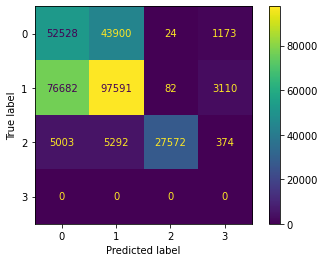

In [ ]:
log_conf = confusion_matrix(log_pred, y_test)
cm_Display = ConfusionMatrixDisplay(log_conf).plot();
cm_Display

In [ ]:
print(classification_report(log_pred, y_test))

              precision    recall  f1-score   support

           0       0.39      0.54      0.45     97625
           1       0.66      0.55      0.60    177465
           2       1.00      0.72      0.84     38241
           3       0.00      0.00      0.00         0

    accuracy                           0.57    313331
   macro avg       0.51      0.45      0.47    313331
weighted avg       0.62      0.57      0.58    313331

